In [11]:
! pip install tqdm update_checker tqdm
! pip install tpot
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import imblearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import itertools
from sklearn.model_selection import train_test_split
from tpot import TPOTRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.decomposition import FastICA
from sklearn.svm import SVC
from sklearn.cross_decomposition import PLSRegression

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
#Load Data
train = pd.read_csv(r'/content/df_features_din.csv')
train.head()
train_x = train.iloc[:, :-1]
train_y = train.iloc[:, -1]
train_x

,Max,min,Mean,Std. deviation,Skewness,Kurtosis,Energy,Max / min,Max - min,SD / mean,Max - min sqrd
0,0.652988,-0.478481,-39.062063,0.098293,1.126915,17.370630,2.473360,-1.364710,1.131468,-0.002516,1.280221
1,0.680325,-0.520884,0.000047,0.104437,1.184565,16.914978,2.792200,-1.306096,1.201208,2201.734642,1.442902
2,0.654511,-0.521990,-78.124979,0.104355,0.918378,15.918480,2.787837,-1.253875,1.176501,-0.001336,1.384155
3,0.634057,-0.541421,-273.437461,0.103709,0.991626,16.377148,2.753444,-1.171099,1.175478,-0.000379,1.381749
4,0.606181,-0.552172,39.062362,0.105350,0.845794,15.462336,2.841272,-1.097813,1.158352,0.002697,1.341780
...,...,...,...,...,...,...,...,...,...,...,...
17400,0.037540,-0.039791,-390.624819,0.015672,-0.005402,-0.671443,0.062877,-0.943438,0.077331,-0.000040,0.005980
17401,0.019695,-0.022420,78.124925,0.009262,-0.165168,-0.691274,0.021962,-0.878484,0.042115,0.000119,0.001774
17402,0.029204,-0.025100,234.374859,0.010622,-0.172708,-0.389803,0.028885,-1.163476,0.054304,0.000045,0.002949
17403,0.028539,-0.025256,78.124818,0.011683,0.165351,-0.753699,0.034942,-1.129990,0.053795,0.000150,0.002894


In [3]:
scaler = StandardScaler()
scaler.fit_transform(train_x)

In [9]:
tpot = TPOTRegressor(generations=10, population_size=10, verbosity=10)
tpot.fit(train_x, train_y)

30 operators have been imported by TPOT.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimization Progress:   0%|          | 0/110 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Expected n_neighbors <= n_samples,  but n_samples = 50, n_neighbors = 79.
_pre_test decorator: _random_mutation_operator: num_test=1 Expected n_neighbors <= n_samples,  but n_samples = 50, n_neighbors = 75.
_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..
_pre_test decorator: _random_mutation_operator: num_test=0 Expected n_neighbors <= n_samples,  but n_samples = 50, n_neighbors = 58.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
_pre_test decorator: _random_mutation_operator: num_test=0 '(slice(None, None, None), 0)' is an invalid key.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
_pre_test decorator: _random_mutation_operator: num_test=0 Expected n_neighbors <=

TPOTRegressor(generations=10, population_size=10, verbosity=10)

In [12]:
pls = PLSRegression(n_components=5)
pls.fit(train_x, train_y)

PLSRegression(n_components=5)

In [13]:
X_train,X_test,Y_train,Y_test = train_test_split(train_x,train_y,train_size=0.70, random_state=2)
input_shape = [X_train.shape[1]]

In [14]:
model_svm = SVC(random_state=1)
model_svm.fit(X_train, Y_train)
y_pred_svm = model_svm.predict(X_test)
print(classification_report(Y_test, y_pred_svm))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.98      0.92      0.95      3498
           1       0.93      0.98      0.96      4060

    accuracy                           0.95      7558
   macro avg       0.95      0.95      0.95      7558
weighted avg       0.95      0.95      0.95      7558



0.9517068007409367

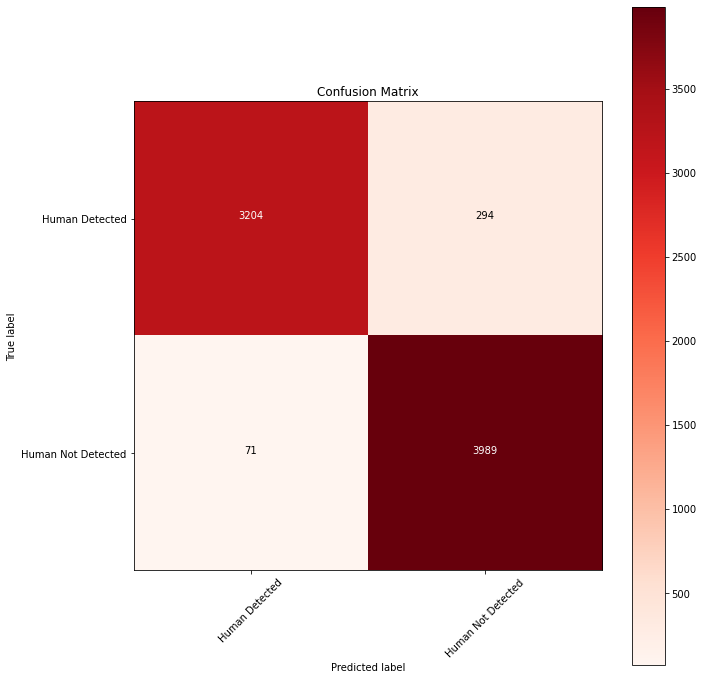

In [15]:
#===========================CONSTRUCTING THE CONFUSION MATRIX=============================#
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Reds):
    
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm = confusion_matrix(Y_test, y_pred_svm)
target_names = ["Human Detected", "Human Not Detected"]
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')
accuracy_score(Y_test, y_pred_svm)

roc_auc_score for SVM:  0.949232143913341


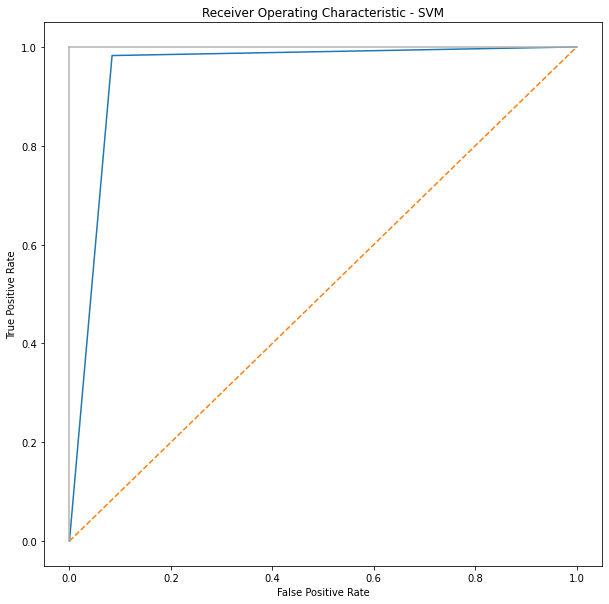

In [16]:
# plot for SVM
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test, y_pred_svm)
print('roc_auc_score for SVM: ', roc_auc_score(Y_test, y_pred_svm))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - SVM')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [17]:
#KNN model

model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train, Y_train)
y_pred_KNN = model_KNN.predict(X_test)
print(classification_report(Y_test, y_pred_KNN))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3498
           1       0.99      0.99      0.99      4060

    accuracy                           0.99      7558
   macro avg       0.99      0.99      0.99      7558
weighted avg       0.99      0.99      0.99      7558



0.9872982270441916

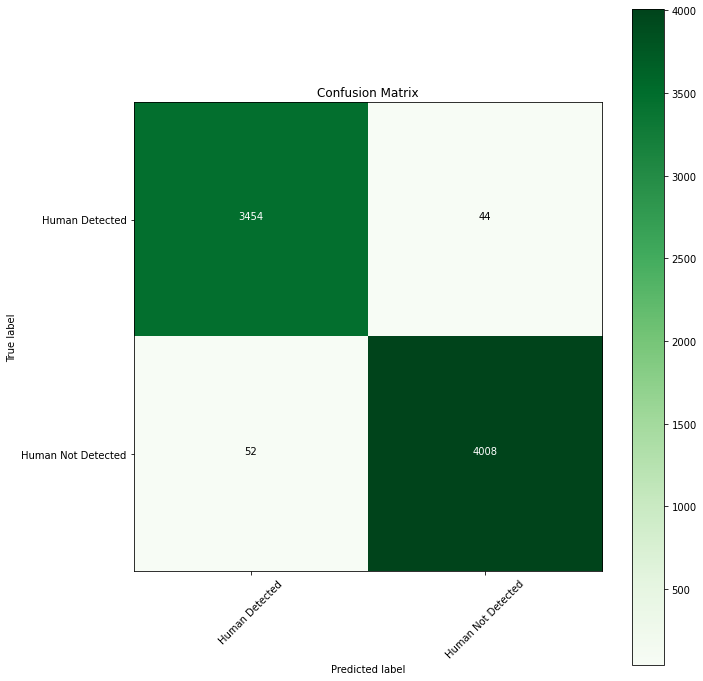

In [18]:
#===========================CONSTRUCTING THE CONFUSION MATRIX=============================#
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Greens):
    
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm = confusion_matrix(Y_test, y_pred_KNN)
target_names = ["Human Detected", "Human Not Detected"]
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')
accuracy_score(Y_test, y_pred_KNN)

roc_auc_score for KNN:  0.9873067509371999


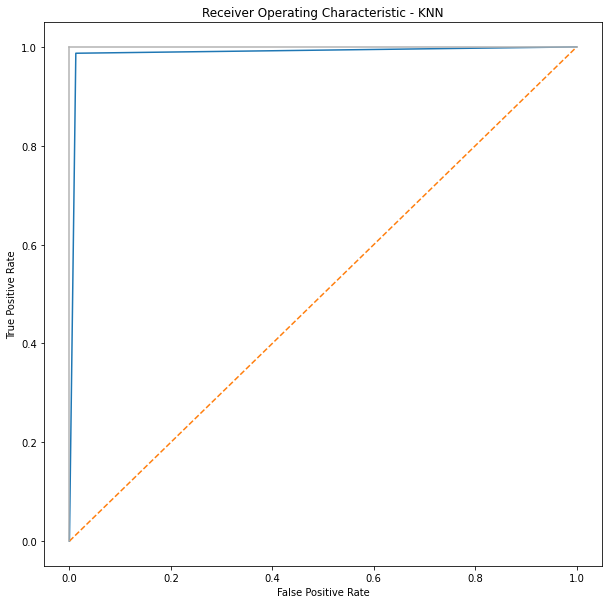

In [19]:
# plot for KNN
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test, y_pred_KNN)
print('roc_auc_score for KNN: ', roc_auc_score(Y_test, y_pred_KNN))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - KNN')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [20]:
#RandomForestClassifier(ensemble) model

model_RFC = RandomForestClassifier(random_state = 1)
model_RFC.fit(X_train, Y_train)
y_pred_RFC = model_RFC.predict(X_test)
print(classification_report(Y_test, y_pred_RFC))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3498
           1       1.00      1.00      1.00      4060

    accuracy                           1.00      7558
   macro avg       1.00      1.00      1.00      7558
weighted avg       1.00      1.00      1.00      7558



0.9958983858163535

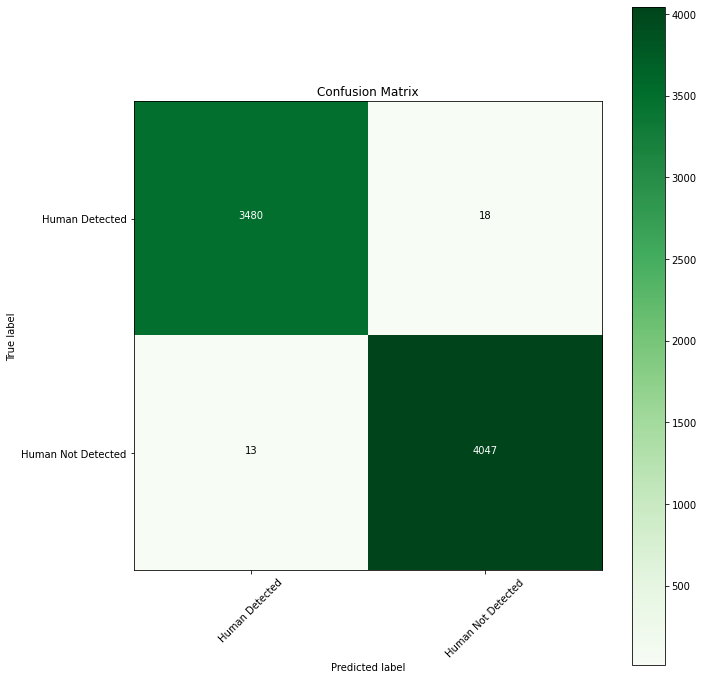

In [21]:
#===========================CONSTRUCTING THE CONFUSION MATRIX=============================#
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Greens):
    
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm = confusion_matrix(Y_test, y_pred_RFC)
target_names = ["Human Detected", "Human Not Detected"]
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')
accuracy_score(Y_test, y_pred_RFC)

roc_auc_score for KNN:  0.9958261159790112


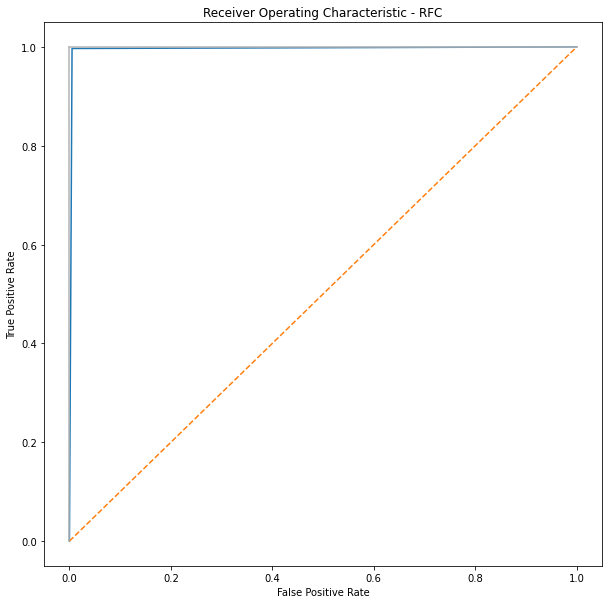

In [22]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test, y_pred_RFC)
print('roc_auc_score for KNN: ', roc_auc_score(Y_test, y_pred_RFC))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - RFC')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()